# Los datos:
El conjunto de datos DatosEleccionesEspaña.xlsx contiene información demográﬁca sobre los distintos municipios de España junto con los resultados que se obtuvieron en las últimas elecciones. Existen 7 posibles variables objetivo:
- AbstentionPtge: Porcentaje de abstención
- Izda Pct: Porcentaje de votos a partidos de izquierda (PSOE y Podemos)
- Dcha Pct: Porcentaje de votos a partidos de derecha (PP y Ciudadanos)
- Otros Pct: Porcentaje de votos a partidos distintos de PP, Ciudadanos, PSOE y Podemos
- AbstencionAlta: Variable dicotómica que toma el valor 1 si el porcentaje de abstención es superior al 30 % y, 0, en otro caso.
- Izquierda: Variable dicotómica que toma el valor 1 si la suma de los votos de izquierdas es superior a la de derechas y otros y, 0, en otro caso.
- Derecha: Variable dicotómica que toma el valor 1 si la suma de los votos de derecha es superior a la de izquierda y otros y, 0, en otro caso.

# The data:
The dataset DatosEleccionesEspaña.xlsx contains demographic information on the different municipalities in Spain along with the results obtained in the last elections. There are 7 possible target variables:
- AbstentionPtge: Percentage of abstention
- Izda Pct: Percentage of votes for left-wing parties (PSOE and Podemos)
- Dcha Pct: Percentage of votes for right-wing parties (PP and Ciudadanos)
- Otros Pct: Percentage of votes for parties other than PP, Ciudadanos, PSOE and Podemos
- AbstencionAlta: Dichotomous variable that takes the value 1 if the percentage of abstention is higher than 30% and 0 otherwise.
- Izquierda: Dichotomous variable that takes the value 1 if the sum of left-wing votes is higher than that of right-wing and others and 0 otherwise.
- Right: Dichotomous variable that takes the value 1 if the sum of the right-wing votes is greater than that of the left and others, and 0 otherwise.

El objetivo de este proyecto es obtener dos modelos de regresión (lineal y logística) seleccionando, de entre las 7 variables anteriores, una variable objetivo continua y otra variable objetivo binaria. El resto de las variables objetivo que no han sido seleccionadas se eliminan del conjunto de datos, no se utilizan como variables explicativas. La variable objetivo continua se utiliza para la construcción del modelo de regresión lineal y la variable objetivo binaria se utiliza para el modelo de regresión logística. Antes de desarrollar los modelos de regresión, es necesario llevar a cabo un proceso de depuración de los datos.

===================================================================================================================================

The objective of this project is to obtain two regression models (linear and logistic) by selecting, from the 7 variables above, a continuous target variable and a binary target variable. The rest of the target variables that have not been selected are eliminated from the data set, they are not used as explanatory variables. The continuous target variable is used for the construction of the linear regression model and the binary target variable is used for the logistic regression model. Before developing the regression models, it is necessary to carry out a data cleaning process.

Las variables elegidas son:
- Porcentaje de abstención electoral (AbstentionPtge): se modelará mediante regresión lineal para determinar en qué medida las variables explicativas afectan la tasa de abstención en los municipios.
- Dominancia del voto de izquierda (Izquierda): se utilizará regresión logística para predecir si un municipio tendrá una mayor proporción de votos hacia partidos de izquierda (PSOE y Podemos) en comparación con los de derecha y otros.

=================================================================================================================================== 

The variables chosen are:
- Electoral abstention rate (AbstentionPtge): will be modelled using linear regression to determine to what extent the explanatory variables affect the abstention rate in the municipalities.
- Dominance of the left-wing vote (Left): logistic regression will be used to predict whether a municipality will have a higher proportion of votes for left-wing parties (PSOE and Podemos) compared to right-wing parties and others.

# Depuración de los datos // Data cleaning

1. Carga del conjunto de datos // Loading the dataset

In [80]:
import pandas as pd
import numpy as np 

datos = pd.read_excel("DatosEleccionesEspaña.xlsx", engine="openpyxl")
print("Primeras filas del dataset:")
display(datos.head())

Primeras filas del dataset:


,Name,CodigoProvincia,CCAA,Population,TotalCensus,AbstentionPtge,AbstencionAlta,Izda_Pct,Dcha_Pct,Otros_Pct,...,ComercTTEHosteleria,Servicios,ActividadPpal,inmuebles,Pob2010,SUPERFICIE,Densidad,PobChange_pct,PersonasInmueble,Explotaciones
0,Abadía,10,Extremadura,336,282,20.213,0,60.444,35.555,1.778,...,0.0,0.0,Otro,216.0,326.0,4507.5593,MuyBaja,3.07,1.56,28
1,Abertura,10,Extremadura,429,364,25.275,0,54.779,44.118,0.368,...,0.0,0.0,Otro,382.0,459.0,6270.7646,MuyBaja,-6.54,1.12,67
2,Acebo,10,Extremadura,569,569,27.241,0,44.203,53.140,0.966,...,0.0,0.0,Otro,918.0,674.0,5702.1000,MuyBaja,-15.58,0.62,74
3,Acehúche,10,Extremadura,822,704,30.114,1,50.813,45.325,0.000,...,0.0,0.0,Otro,599.0,842.0,9106.4649,MuyBaja,-2.38,1.37,66
4,Aceituna,10,Extremadura,623,540,30.185,1,44.562,49.867,0.796,...,0.0,0.0,Otro,394.0,625.0,4007.6141,MuyBaja,-0.32,1.58,96


2. Revisión Inicial de las variables // Initial review of variables

In [82]:
print("Información sobre los datos:")
datos.info()

Información sobre los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8117 entries, 0 to 8116
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          8117 non-null   object 
 1   CodigoProvincia               8117 non-null   int64  
 2   CCAA                          8117 non-null   object 
 3   Population                    8117 non-null   int64  
 4   TotalCensus                   8117 non-null   int64  
 5   AbstentionPtge                8117 non-null   float64
 6   AbstencionAlta                8117 non-null   int64  
 7   Izda_Pct                      8117 non-null   float64
 8   Dcha_Pct                      8117 non-null   float64
 9   Otros_Pct                     8117 non-null   float64
 10  Izquierda                     8117 non-null   int64  
 11  Derecha                       8117 non-null   int64  
 12  Age_0-4_Ptge                  811

In [83]:
# Verificación de variables objetivo
print("Verificación de variables objetivo:")
print("- Tipo de 'AbstentionPtge':", datos["AbstentionPtge"].dtype)
print("- Valores únicos en 'Izquierda':", datos["Izquierda"].unique())

Verificación de variables objetivo:
- Tipo de 'AbstentionPtge': float64
- Valores únicos en 'Izquierda': [1 0]


3. Conversión y corrección de tipos de datos // 3. Data type conversion and correction

In [85]:
# Asegurar que variables numéricas que representan categorías sean categóricas
categoricas = datos.select_dtypes(include=["object", "category"]).columns.tolist()
categoricas.extend(["CodigoProvincia"])  # Código de provincia es categórico

# Variables continuas mal interpretadas como enteras
continuas = datos.select_dtypes(include=["float64", "int64"]).columns.tolist()
continuas.extend(["Population", "TotalCensus", "Explotaciones"])

4. Clasificación de las variables // Classification of variables

In [87]:
# Variables binarias (aquellas con solo dos valores distintos)
binarias = [col for col in continuas if datos[col].nunique() == 2]

# Eliminar variables binarias de la lista de continuas
continuas = [col for col in continuas if col not in binarias]

# Verificar si hay variables sin clasificar
total_vars = set(datos.columns)
clasificadas = set(continuas + categoricas + binarias)
faltantes = total_vars - clasificadas

# Mostrar clasificación de variables
print("Clasificación de variables:")
print(f"\n- Continuas ({len(continuas)}): {continuas}")
print(f"- Categóricas ({len(categoricas)}): {categoricas}")
print(f"- Binarias ({len(binarias)}): {binarias}")

# Mostrar variables sin clasificar si existen
if faltantes:
    print("Variables no clasificadas correctamente:", faltantes)

Clasificación de variables:

- Continuas (37): ['CodigoProvincia', 'Population', 'TotalCensus', 'AbstentionPtge', 'Izda_Pct', 'Dcha_Pct', 'Otros_Pct', 'Age_0-4_Ptge', 'Age_under19_Ptge', 'Age_19_65_pct', 'Age_over65_pct', 'WomanPopulationPtge', 'ForeignersPtge', 'SameComAutonPtge', 'SameComAutonDiffProvPtge', 'DifComAutonPtge', 'UnemployLess25_Ptge', 'Unemploy25_40_Ptge', 'UnemployMore40_Ptge', 'AgricultureUnemploymentPtge', 'IndustryUnemploymentPtge', 'ConstructionUnemploymentPtge', 'ServicesUnemploymentPtge', 'totalEmpresas', 'Industria', 'Construccion', 'ComercTTEHosteleria', 'Servicios', 'inmuebles', 'Pob2010', 'SUPERFICIE', 'PobChange_pct', 'PersonasInmueble', 'Explotaciones', 'Population', 'TotalCensus', 'Explotaciones']
- Categóricas (5): ['Name', 'CCAA', 'ActividadPpal', 'Densidad', 'CodigoProvincia']
- Binarias (3): ['AbstencionAlta', 'Izquierda', 'Derecha']


5. Resumen Estadístico // Statistical summary

In [89]:
print("\nEstadísticas descriptivas de variables continuas:")
datos[continuas].describe().round(2)


Estadísticas descriptivas de variables continuas:


,CodigoProvincia,Population,TotalCensus,AbstentionPtge,Izda_Pct,Dcha_Pct,Otros_Pct,Age_0-4_Ptge,Age_under19_Ptge,Age_19_65_pct,...,Servicios,inmuebles,Pob2010,SUPERFICIE,PobChange_pct,PersonasInmueble,Explotaciones,Population,TotalCensus,Explotaciones
count,8117.00,8117.00,8117.00,8117.00,8117.00,8117.00,8117.00,8117.00,8117.00,8117.00,...,8055.00,7979.00,8110.00,8109.00,8110.00,7979.00,8117.00,8117.00,8117.00,8117.00
mean,26.66,5722.34,4247.86,26.50,34.40,48.91,14.67,3.02,13.56,57.37,...,171.85,3240.04,5777.93,6215.30,-4.90,1.30,2447.81,5722.34,4247.86,2447.81
std,14.89,46204.18,34423.44,7.53,16.48,19.95,25.10,2.05,6.78,6.82,...,2447.04,24314.68,47527.88,9218.60,10.38,0.57,15064.55,46204.18,34423.44,15064.55
min,1.00,5.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,23.46,...,0.00,6.00,5.00,2.58,-52.27,0.11,1.00,5.00,5.00,1.00
25%,13.00,166.00,140.00,21.68,21.89,38.69,0.76,1.39,8.33,53.84,...,0.00,180.00,177.25,1839.24,-10.40,0.85,22.00,166.00,140.00,22.00
50%,26.00,548.00,447.00,26.42,35.16,51.58,1.88,2.98,13.88,58.66,...,0.00,485.00,581.50,3488.55,-4.96,1.25,52.00,548.00,447.00,52.00
75%,41.00,2427.00,1843.00,31.47,46.03,62.19,16.57,4.53,19.06,61.82,...,40.00,1586.50,2482.75,6894.53,0.09,1.73,137.00,2427.00,1843.00,137.00
max,50.00,3141991.00,2363829.00,57.58,94.12,100.00,100.00,13.24,33.70,100.00,...,177677.00,1615548.00,3273049.00,175022.91,138.46,3.33,99999.00,3141991.00,2363829.00,99999.00


6. Análisis de valores faltantes // Missing value analysis

In [91]:
#Valores faltantes
print("\nValores faltantes por columna:")
faltantes = datos.isnull().sum()
faltantes = faltantes[faltantes > 0]
print(faltantes)

print("\nPorcentaje de valores faltantes por columna:")
faltantes_pct = datos.isnull().mean() * 100
faltantes_pct = faltantes_pct[faltantes_pct > 0]
print(faltantes_pct)


Valores faltantes por columna:
totalEmpresas            5
Industria              188
Construccion           139
ComercTTEHosteleria      9
Servicios               62
inmuebles              138
Pob2010                  7
SUPERFICIE               8
PobChange_pct            7
PersonasInmueble       138
dtype: int64

Porcentaje de valores faltantes por columna:
totalEmpresas          0.061599
Industria              2.316127
Construccion           1.712455
ComercTTEHosteleria    0.110878
Servicios              0.763829
inmuebles              1.700136
Pob2010                0.086239
SUPERFICIE             0.098559
PobChange_pct          0.086239
PersonasInmueble       1.700136
dtype: float64


7. Identificación de datos erróneos y valores atípicos // Identifying erroneous data and outliers

In [93]:
#Identificación de valores atípicos en AbstentionPtge
Q1, Q3 = datos["AbstentionPtge"].quantile([0.25, 0.75])
IQR = Q3 - Q1
outliers = datos[(datos["AbstentionPtge"] < Q1 - 1.5 * IQR) | (datos["AbstentionPtge"] > Q3 + 1.5 * IQR)]
print(f"Número de valores atípicos en AbstentionPtge: {len(outliers)}")
print(f"Rango de valores atípicos: < {Q1 - 1.5 * IQR:.2f} o > {Q3 + 1.5 * IQR:.2f}")

# Verificación de porcentajes inválidos
porcentajes_invalidos = datos[(datos["AbstentionPtge"] < 0) | (datos["AbstentionPtge"] > 100)]
print(f"Número de filas con porcentajes inválidos: {len(porcentajes_invalidos)}")

Número de valores atípicos en AbstentionPtge: 120
Rango de valores atípicos: < 6.99 o > 46.16
Número de filas con porcentajes inválidos: 0


8. Visualización de los datos // Data visualitation

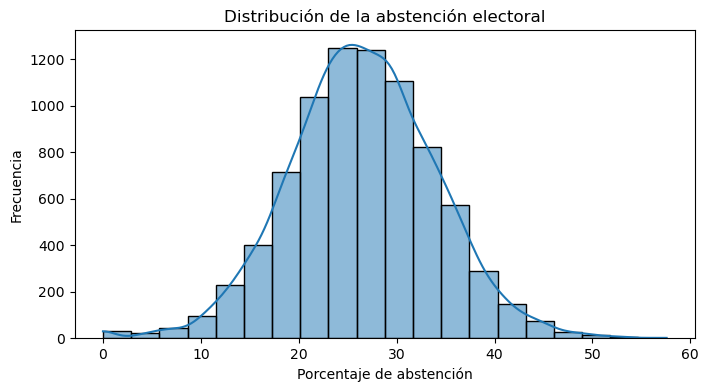

In [95]:
# Distribución de la Abstención Electoral
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(datos["AbstentionPtge"].dropna(), bins=20, kde=True)
plt.title("Distribución de la abstención electoral")
plt.xlabel("Porcentaje de abstención")
plt.ylabel("Frecuencia")
plt.show()

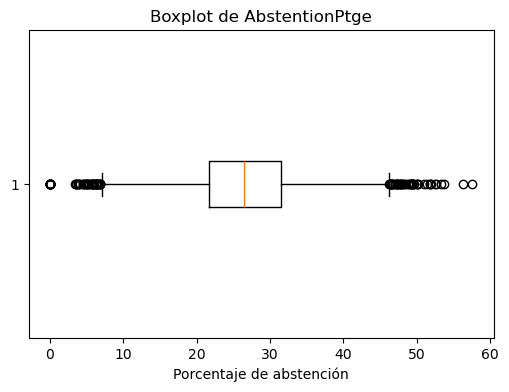

In [96]:
#Detección de Valores Atípicos en AbstentionPtge
plt.figure(figsize=(6, 4))
plt.boxplot(datos["AbstentionPtge"].dropna(), vert=False)
plt.title("Boxplot de AbstentionPtge")
plt.xlabel("Porcentaje de abstención")
plt.show()

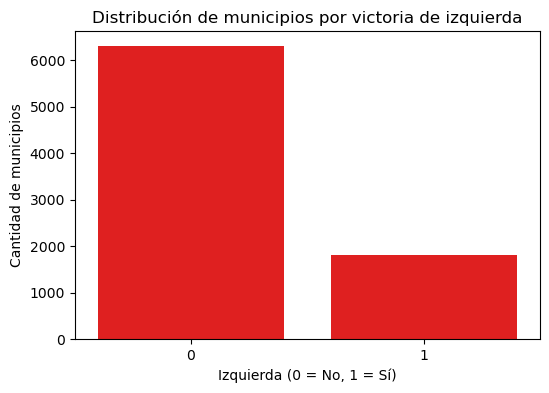

In [97]:
#Distribución de la Variable Binaria Izquierda
plt.figure(figsize=(6, 4))
sns.countplot(x="Izquierda", data=datos, color="red")
plt.title("Distribución de municipios por victoria de izquierda")
plt.xlabel("Izquierda (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de municipios")
plt.show()

9. Corrección de los errores detectados // Correction of detected errors

9.1 Eliminar duplicados // Delete duplicates

In [108]:
datos_clean = datos.copy()

# Eliminación de duplicados
duplicados = datos_clean.duplicated().sum()
print(f"Número de filas duplicadas antes de la eliminación: {duplicados}")
datos_clean = datos_clean.drop_duplicates()
print(f"Número de filas después de eliminar duplicados: {len(datos_clean)}")

Número de filas duplicadas antes de la eliminación: 0
Número de filas después de eliminar duplicados: 8117


9.2 Imputación de valores faltantes // Imputation of missing values

In [112]:
# Diccionario para almacenar los cambios aplicados
resumen_cambios = {"continuas": {}, "categóricas": {}, "binarias": {}}

# Imputación en variables continuas con la media
for col in continuas:
    if col in datos_clean.columns:
        mean_value = datos_clean[col].mean()
        datos_clean[col] = datos_clean[col].fillna(mean_value)
        resumen_cambios["continuas"][col] = f"Imputado con la media: {mean_value:.2f}"

# Imputación en variables categóricas con la moda
for col in categoricas:
    if col in datos_clean.columns:
        moda_value = datos_clean[col].mode().dropna()
        if not moda_value.empty:
            moda_value = moda_value.iloc[0]
            datos_clean[col] = datos_clean[col].astype(str).fillna(moda_value)
            resumen_cambios["categóricas"][col] = f"Imputado con la moda: {moda_value}"
        else:
            print(f"Advertencia: No se pudo calcular la moda para '{col}'.")

# Imputación en variables binarias con la moda
for col in binarias:
    if col in datos_clean.columns:
        moda_value = datos_clean[col].mode().dropna()
        if not moda_value.empty:
            moda_value = moda_value.iloc[0]
            datos_clean[col] = datos_clean[col].astype(int).fillna(moda_value)
            resumen_cambios["binarias"][col] = f"Imputado con la moda: {moda_value}"
        else:
            print(f"Advertencia: No se pudo calcular la moda para '{col}'.")


In [113]:
#Verificación Final de Valores Faltantes
print("Valores nulos restantes después de la imputación:")
faltantes_finales = datos_clean.isnull().sum()
print(faltantes_finales[faltantes_finales > 0])

Valores nulos restantes después de la imputación:
Series([], dtype: int64)


In [115]:
# Filtrado de Valores Inválidos en la Abstención
datos_clean = datos_clean[(datos_clean["AbstentionPtge"] >= 0) & (datos_clean["AbstentionPtge"] <= 100)]
print(f"Filas restantes después de filtrar AbstentionPtge fuera del rango: {len(datos_clean)}")

Filas restantes después de filtrar AbstentionPtge fuera del rango: 8117


In [116]:
# Resumen Final de la Limpieza de Datos
print("Resumen después de la limpieza:")
print(f"- Filas finales: {len(datos_clean)}")
print(f"- Total valores nulos restantes: {datos_clean.isnull().sum().sum()}")

Resumen después de la limpieza:
- Filas finales: 8117
- Total valores nulos restantes: 0


In [118]:
# Registro de Cambios Aplicados
print("Resumen de imputaciones:")
for categoria, cambios in resumen_cambios.items():
    print(f"\n{categoria.capitalize()}:")
    for col, cambio in cambios.items():
        print(f"  {col}: {cambio}")

Resumen de imputaciones:

Continuas:
  CodigoProvincia: Imputado con la media: 26.66
  Population: Imputado con la media: 5722.34
  TotalCensus: Imputado con la media: 4247.86
  AbstentionPtge: Imputado con la media: 26.50
  Izda_Pct: Imputado con la media: 34.40
  Dcha_Pct: Imputado con la media: 48.91
  Otros_Pct: Imputado con la media: 14.67
  Age_0-4_Ptge: Imputado con la media: 3.02
  Age_under19_Ptge: Imputado con la media: 13.56
  Age_19_65_pct: Imputado con la media: 57.37
  Age_over65_pct: Imputado con la media: 29.07
  WomanPopulationPtge: Imputado con la media: 47.30
  ForeignersPtge: Imputado con la media: 5.62
  SameComAutonPtge: Imputado con la media: 81.63
  SameComAutonDiffProvPtge: Imputado con la media: 4.34
  DifComAutonPtge: Imputado con la media: 10.73
  UnemployLess25_Ptge: Imputado con la media: 7.32
  Unemploy25_40_Ptge: Imputado con la media: 37.00
  UnemployMore40_Ptge: Imputado con la media: 55.68
  AgricultureUnemploymentPtge: Imputado con la media: 8.40
  I

10. Análisis de valores atípicos y decisiones // Outlier analysis and decisions

In [125]:
# Detección de Valores Atípicos
datos_clean = datos_clean.copy()

# Variables seleccionadas para análisis de valores atípicos
variables_clave = ["AbstentionPtge", "Population", "Izda_Pct", "Dcha_Pct", "Otros_Pct"]

# Detección de valores atípicos
for col in variables_clave:
    Q1, Q3 = datos_clean[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    limite_inferior, limite_superior = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    atipicos = datos_clean[(datos_clean[col] < limite_inferior) | (datos_clean[col] > limite_superior)]
    print(f"{col}: {len(atipicos)} valores atípicos detectados")

AbstentionPtge: 120 valores atípicos detectados
Population: 1154 valores atípicos detectados
Izda_Pct: 16 valores atípicos detectados
Dcha_Pct: 112 valores atípicos detectados
Otros_Pct: 1204 valores atípicos detectados


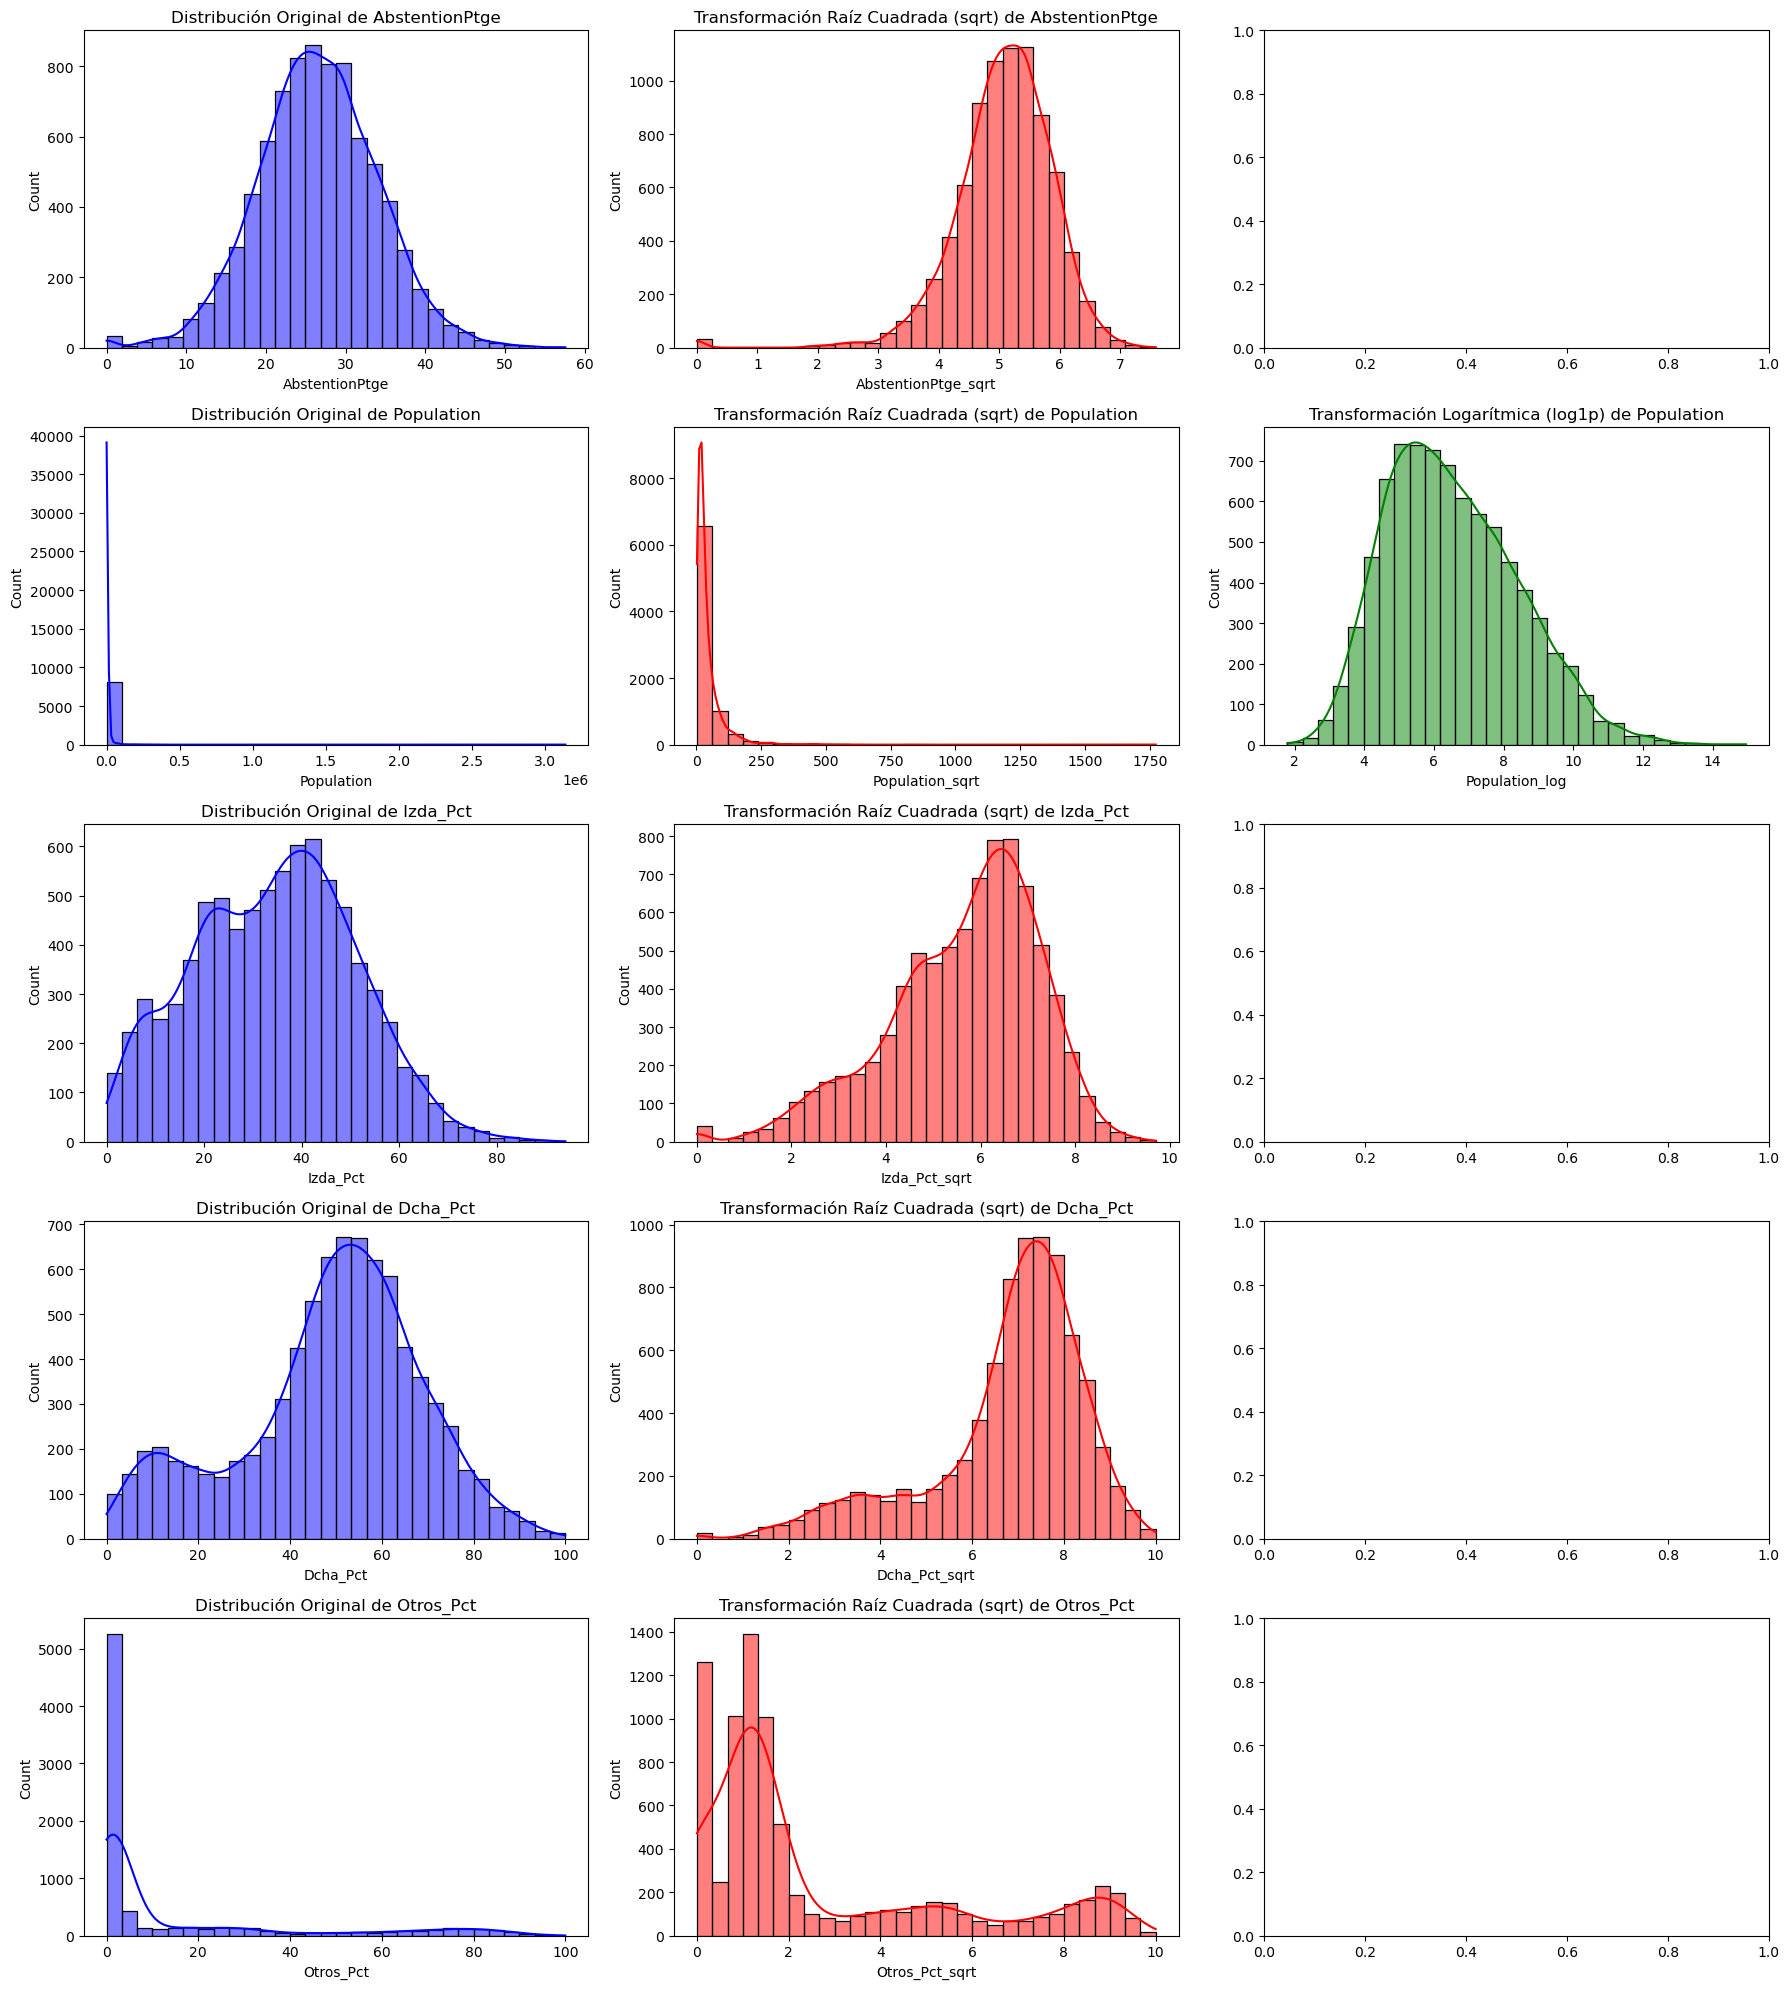

In [127]:
# Comparación de Transformaciones para Atípicos
transformaciones_finales = {}

# Visualización de transformaciones
fig, axes = plt.subplots(len(variables_clave), 3, figsize=(18, len(variables_clave) * 4))

for i, col in enumerate(variables_clave):
    # Histogramas: Original, sqrt y log1p
    sns.histplot(datos_clean[col], kde=True, bins=30, color='blue', ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribución Original de {col}")

    datos_clean[col + "_sqrt"] = np.sqrt(datos_clean[col])
    sns.histplot(datos_clean[col + "_sqrt"], kde=True, bins=30, color='red', ax=axes[i, 1])
    axes[i, 1].set_title(f"Transformación Raíz Cuadrada (sqrt) de {col}")

    if (datos_clean[col] > 0).all():  # Evita aplicar log a valores negativos o cero
        datos_clean[col + "_log"] = np.log1p(datos_clean[col])
        sns.histplot(datos_clean[col + "_log"], kde=True, bins=30, color='green', ax=axes[i, 2])
        axes[i, 2].set_title(f"Transformación Logarítmica (log1p) de {col}")
        transformaciones_finales[col] = "log1p"
    else:
        transformaciones_finales[col] = "sqrt"

plt.tight_layout()
plt.show()

In [128]:
#Aplicación de Transformaciones Finales
print("Transformaciones aplicadas a cada variable:")
for variable, transformacion in transformaciones_finales.items():
    print(f"{variable}: {transformacion}")

# Aplicar las transformaciones finales
for col, transform in transformaciones_finales.items():
    if transform == "sqrt":
        datos_clean[col] = np.sqrt(datos_clean[col])
    elif transform == "log1p":
        datos_clean[col] = np.log1p(datos_clean[col])

Transformaciones aplicadas a cada variable:
AbstentionPtge: sqrt
Population: log1p
Izda_Pct: sqrt
Dcha_Pct: sqrt
Otros_Pct: sqrt


11. Análisis de valores perdidos e imputaciones // Analysis of missing values and imputations

In [132]:
# Identificación de Valores Perdidos
valores_perdidos = datos_clean.isnull().sum()
porcentaje_perdidos = (valores_perdidos / len(datos_clean)) * 100

# Crear un DataFrame con la información de valores nulos
valores_perdidos_df = pd.DataFrame({
    'Valores Perdidos': valores_perdidos,
    'Porcentaje': porcentaje_perdidos
})

# Filtrar solo las columnas con valores perdidos
valores_perdidos_df = valores_perdidos_df[valores_perdidos_df['Valores Perdidos'] > 0]

# Mostrar resumen de valores perdidos
print("Resumen de valores perdidos:")
print(valores_perdidos_df.sort_values(by='Porcentaje', ascending=False))

Resumen de valores perdidos:
Empty DataFrame
Columns: [Valores Perdidos, Porcentaje]
Index: []


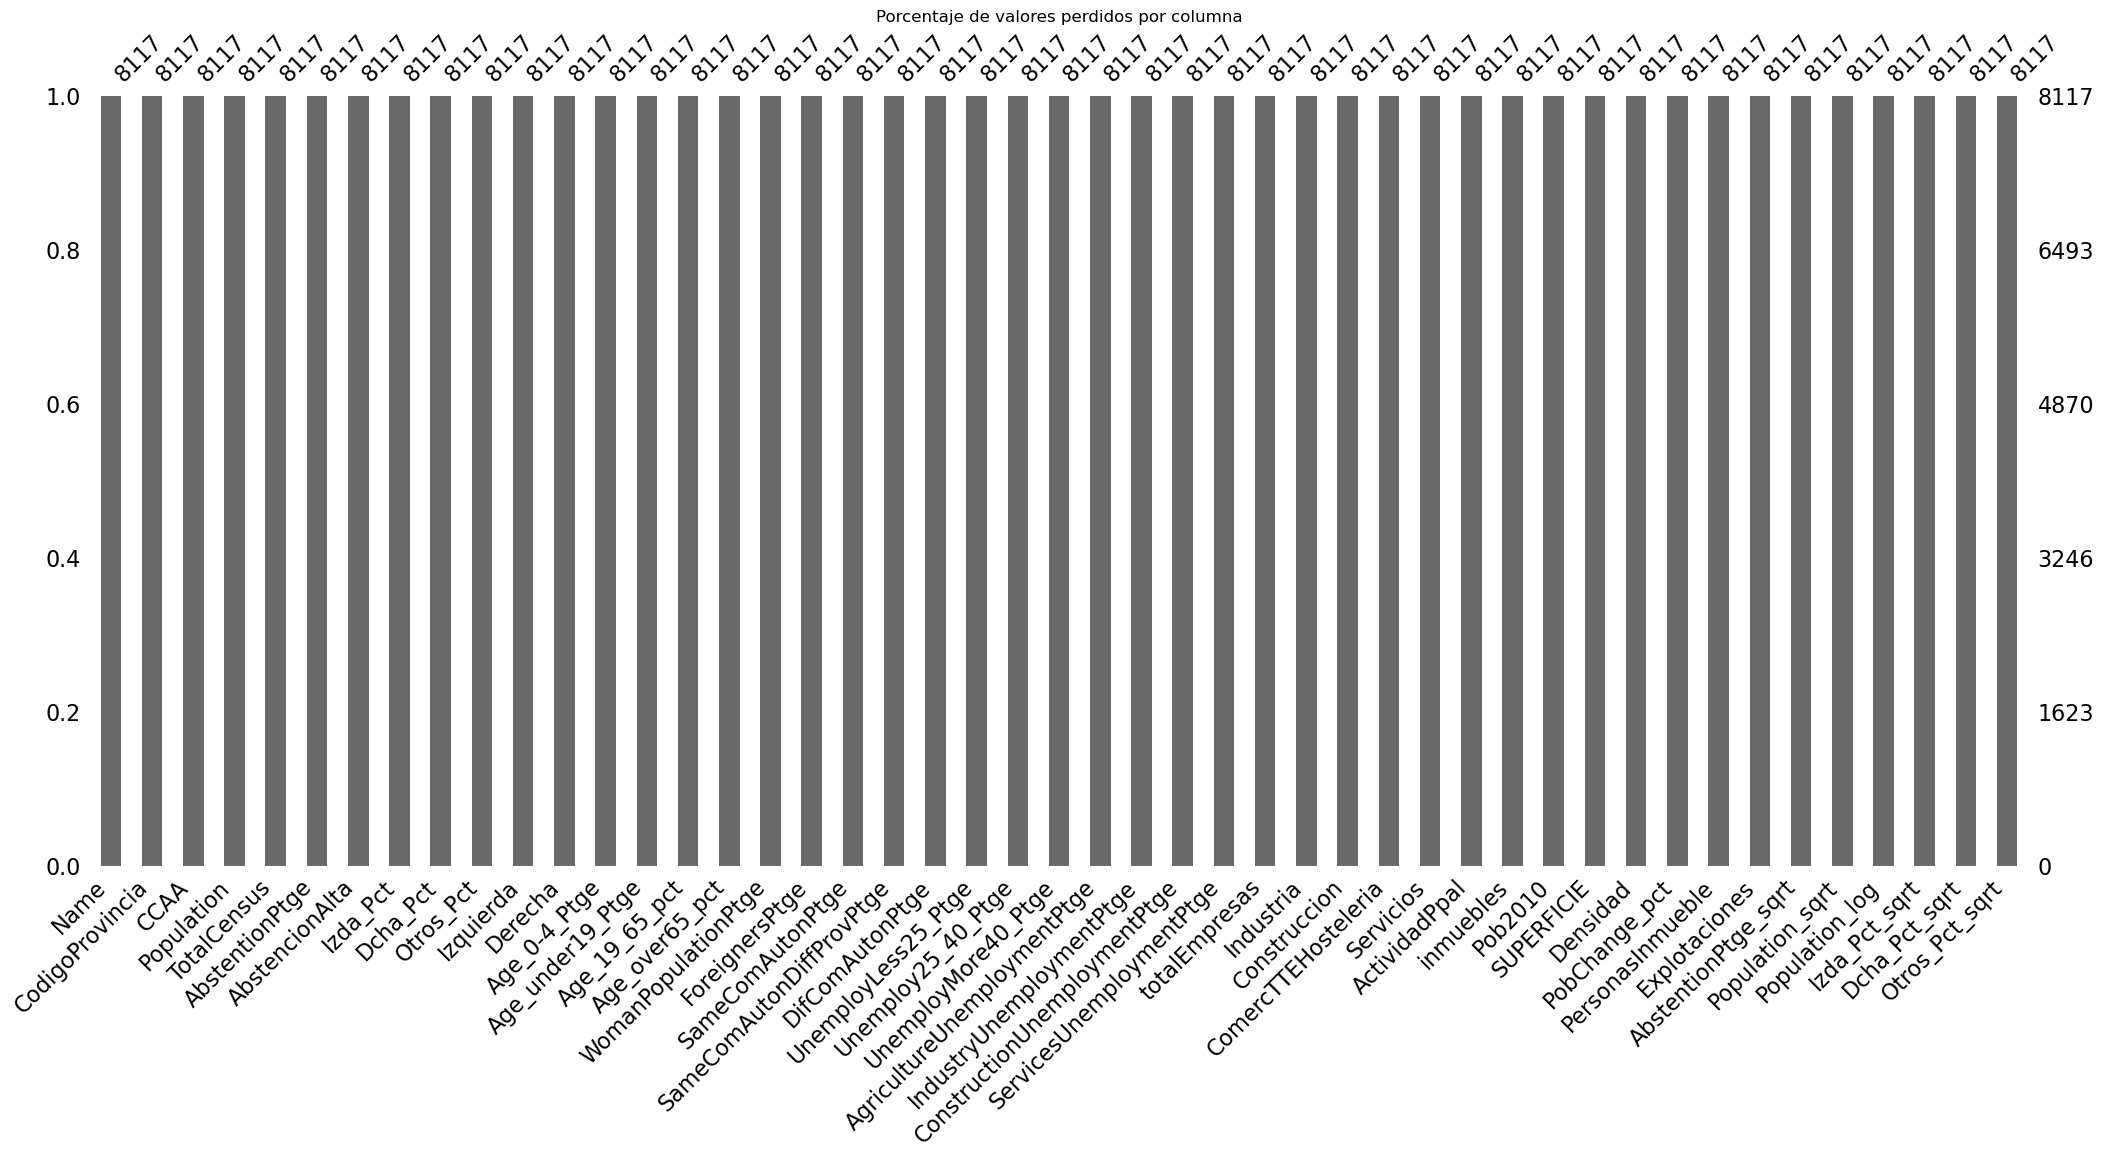

In [134]:
# Visualización de la Distribución de Valores Perdidos
import missingno as msno

# Visualización de valores perdidos
plt.figure(figsize=(10, 5))
msno.bar(datos_clean)
plt.title("Porcentaje de valores perdidos por columna")
plt.show()

12. Detección de las relaciones entre las variables // Detection of the relations between the variables

In [137]:
# Identificación de las Variables Continuas
variables_continuas = [col for col in datos_clean.select_dtypes(include=['float64', 'int64']).columns 
                       if datos_clean[col].nunique() > 10]  # Se eliminan variables binarias


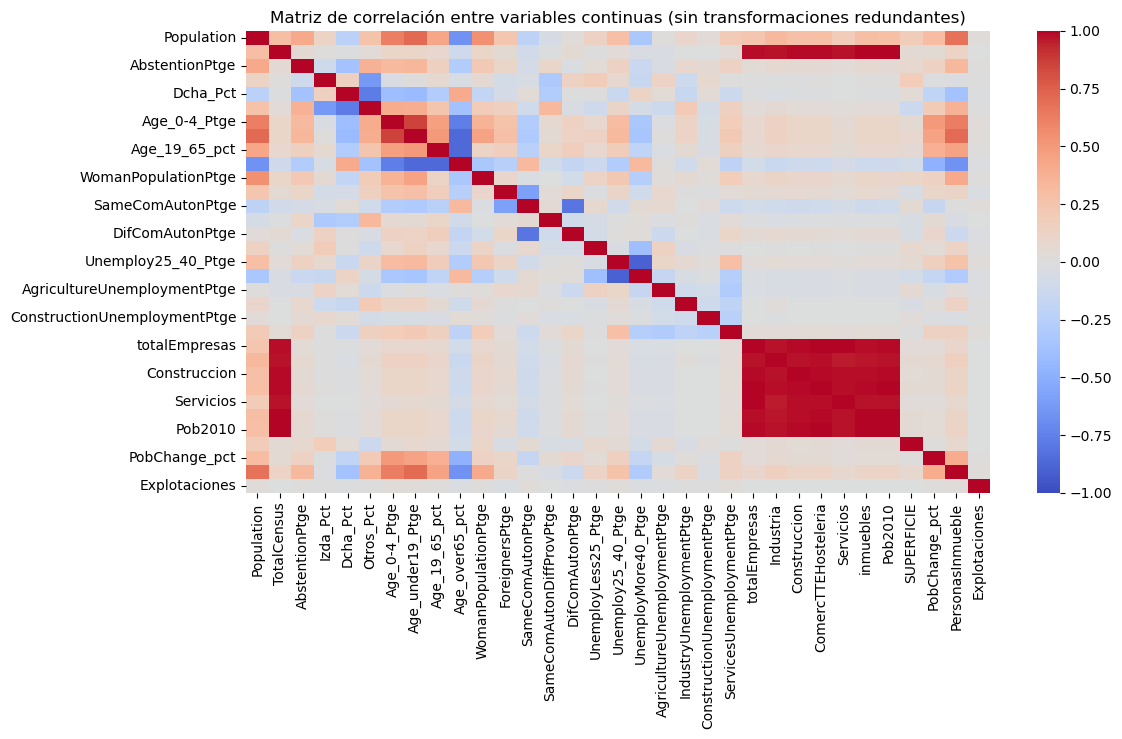

In [139]:
# Matriz de Correlación entre Variables Continuas
filtered_variables = [col for col in variables_continuas if not col.endswith(('_sqrt', '_log'))]

matriz_correlacion = datos_clean[filtered_variables].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(matriz_correlacion, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación entre variables continuas (sin transformaciones redundantes)')
plt.show()


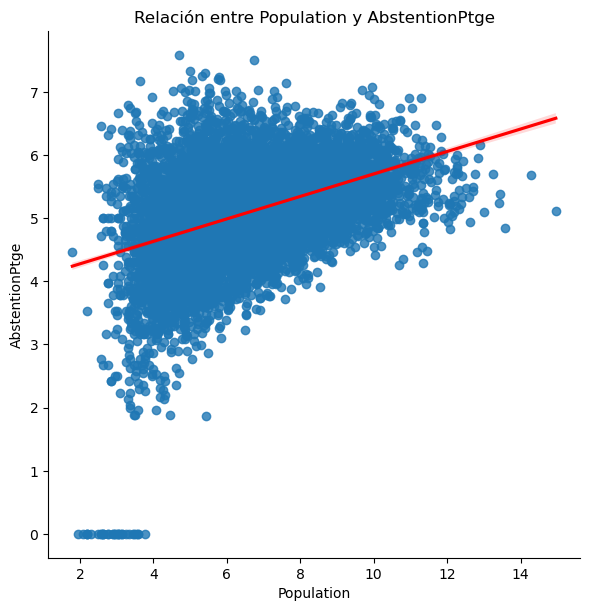

In [141]:
# Correlación de variables continuas con AbstentionPtge
correlacion_abstencion = datos_clean[filtered_variables].corrwith(datos_clean["AbstentionPtge"]).sort_values(ascending=False)

# Seleccionar la variable con mayor correlación absoluta (excluyendo AbstentionPtge)
variable_max_corr = correlacion_abstencion.drop("AbstentionPtge").idxmax()

# Gráfico de dispersión con la variable más correlacionada con AbstentionPtge
sns.lmplot(x=variable_max_corr, y="AbstentionPtge", data=datos_clean, height=6, line_kws={"color": "red"})
plt.title(f"Relación entre {variable_max_corr} y AbstentionPtge")
plt.show()

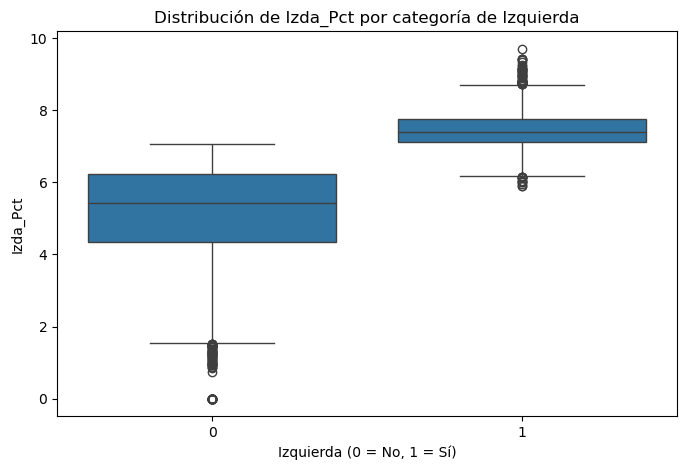

In [143]:
from scipy.stats import pointbiserialr

# Correlación de variables continuas con Izquierda 
correlaciones_binarias = {}
for col in filtered_variables:
    coef, p_value = pointbiserialr(datos_clean["Izquierda"], datos_clean[col])
    correlaciones_binarias[col] = coef

# Ordenar y mostrar correlaciones con Izquierda
correlacion_izquierda = pd.Series(correlaciones_binarias).sort_values(ascending=False)

# Seleccionar la variable con mayor correlación con Izquierda
variable_max_corr_bin = correlacion_izquierda.idxmax()

# Boxplot de la variable más correlacionada con Izquierda
plt.figure(figsize=(8, 5))
sns.boxplot(x="Izquierda", y=variable_max_corr_bin, data=datos_clean)
plt.title(f"Distribución de {variable_max_corr_bin} por categoría de Izquierda")
plt.xlabel("Izquierda (0 = No, 1 = Sí)")
plt.show()

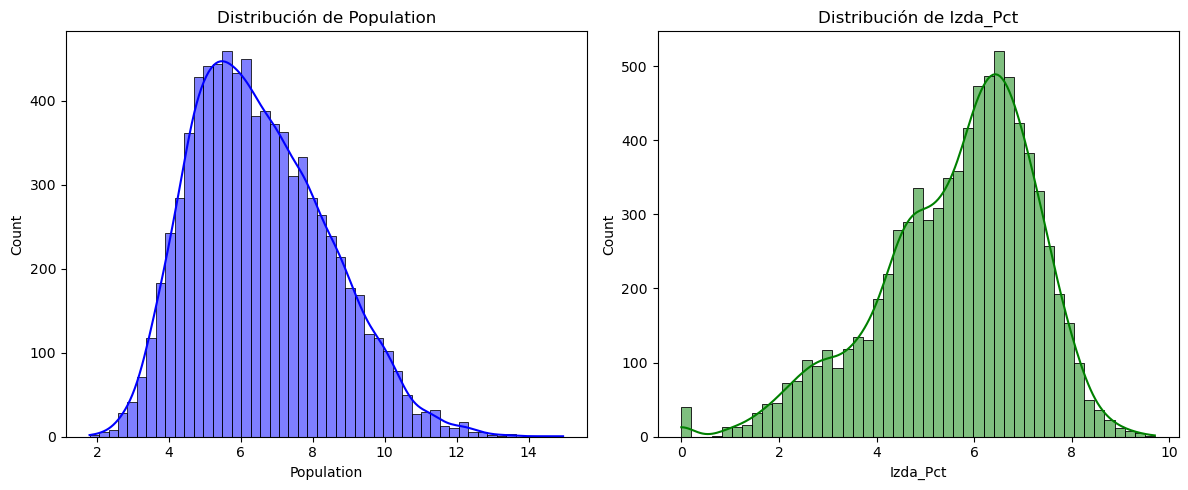

In [145]:
# Distribución de las Variables Más Correlacionadas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(datos_clean[variable_max_corr], kde=True, ax=axes[0], color='blue')
axes[0].set_title(f"Distribución de {variable_max_corr}")

sns.histplot(datos_clean[variable_max_corr_bin], kde=True, ax=axes[1], color='green')
axes[1].set_title(f"Distribución de {variable_max_corr_bin}")

plt.tight_layout()
plt.show()

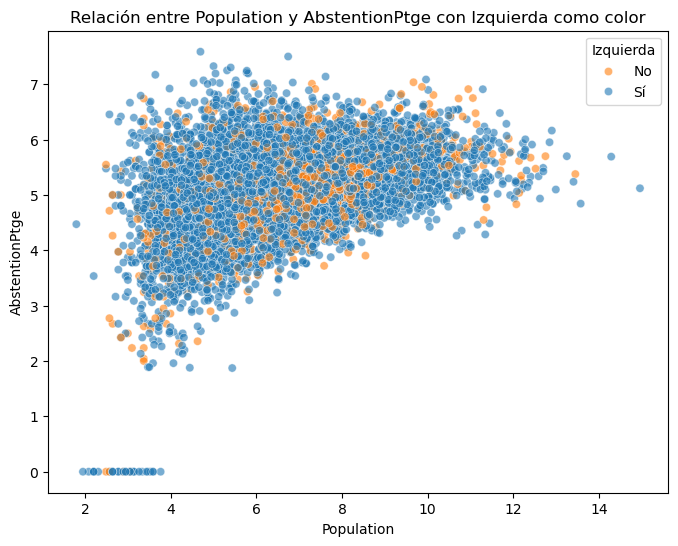

In [147]:
# Relación Entre las Dos Variables Más Correlacionadas
plt.figure(figsize=(8, 6))
sns.scatterplot(x=datos_clean[variable_max_corr], y=datos_clean["AbstentionPtge"], hue=datos_clean["Izquierda"], alpha=0.6)
plt.title(f"Relación entre {variable_max_corr} y AbstentionPtge con Izquierda como color")
plt.xlabel(variable_max_corr)
plt.ylabel("AbstentionPtge")
plt.legend(title="Izquierda", labels=["No", "Sí"])
plt.show()

# Regresión lineal // Linear regrassion

In [151]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
#Carga de Datos y Selección de Variables
datos = pd.read_excel("DatosEleccionesEspaña.xlsx", engine="openpyxl")

# Seleccionar solo variables continuas sin transformaciones
variables_continuas = datos.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Eliminar variables altamente correlacionadas (>0.8)
correlacion_matriz = datos[variables_continuas].corr().abs()
variables_correladas = set()

# Identificar pares de variables con correlación mayor a 0.8
for i in range(len(correlacion_matriz.columns)):
    for j in range(i):
        if correlacion_matriz.iloc[i, j] > 0.8:
            variables_correladas.add(correlacion_matriz.columns[i])

# Filtrar solo las variables no altamente correlacionadas
variables_seleccionadas = [var for var in variables_continuas if var not in variables_correladas]

# Crear nuevo DataFrame solo con las variables seleccionadas
datos_filtrados = datos[variables_seleccionadas]

# Mostrar información clave
print(f"Variables seleccionadas ({len(variables_seleccionadas)}): {variables_seleccionadas}")
print(f"Variables eliminadas por alta correlación ({len(variables_correladas)}): {variables_correladas}")

datos_filtrados.head()

Variables seleccionadas (25): ['CodigoProvincia', 'Population', 'AbstentionPtge', 'AbstencionAlta', 'Izda_Pct', 'Dcha_Pct', 'Otros_Pct', 'Izquierda', 'Derecha', 'Age_0-4_Ptge', 'Age_19_65_pct', 'WomanPopulationPtge', 'ForeignersPtge', 'SameComAutonPtge', 'SameComAutonDiffProvPtge', 'UnemployLess25_Ptge', 'Unemploy25_40_Ptge', 'AgricultureUnemploymentPtge', 'IndustryUnemploymentPtge', 'ConstructionUnemploymentPtge', 'ServicesUnemploymentPtge', 'SUPERFICIE', 'PobChange_pct', 'PersonasInmueble', 'Explotaciones']
Variables eliminadas por alta correlación (12): {'DifComAutonPtge', 'UnemployMore40_Ptge', 'Servicios', 'Industria', 'inmuebles', 'Age_under19_Ptge', 'Age_over65_pct', 'totalEmpresas', 'ComercTTEHosteleria', 'TotalCensus', 'Construccion', 'Pob2010'}


,CodigoProvincia,Population,AbstentionPtge,AbstencionAlta,Izda_Pct,Dcha_Pct,Otros_Pct,Izquierda,Derecha,Age_0-4_Ptge,...,UnemployLess25_Ptge,Unemploy25_40_Ptge,AgricultureUnemploymentPtge,IndustryUnemploymentPtge,ConstructionUnemploymentPtge,ServicesUnemploymentPtge,SUPERFICIE,PobChange_pct,PersonasInmueble,Explotaciones
0,10,336,20.213,0,60.444,35.555,1.778,1,0,3.869,...,2.381,54.762,4.762,9.524,11.905,73.810,4507.5593,3.07,1.56,28
1,10,429,25.275,0,54.779,44.118,0.368,1,0,1.632,...,16.216,32.432,8.108,8.108,10.811,67.568,6270.7646,-6.54,1.12,67
2,10,569,27.241,0,44.203,53.140,0.966,0,1,1.230,...,8.197,36.066,22.951,9.836,13.115,49.180,5702.1000,-15.58,0.62,74
3,10,822,30.114,1,50.813,45.325,0.000,1,0,4.258,...,7.407,61.111,16.667,5.556,16.667,59.259,9106.4649,-2.38,1.37,66
4,10,623,30.185,1,44.562,49.867,0.796,0,1,3.531,...,15.385,48.077,21.154,0.000,11.538,61.538,4007.6141,-0.32,1.58,96


In [152]:
import itertools
#Creación de Interacciones entre Variables Continuas
correlaciones_abstencion = datos_filtrados.corr()["AbstentionPtge"].abs().sort_values(ascending=False)
top_variables = correlaciones_abstencion.index[1:11].tolist()  # Excluir `AbstentionPtge`

# Generar interacciones solo entre estas variables
interacciones_dict = {f"{var1}*{var2}": datos_filtrados[var1] * datos_filtrados[var2] 
                      for var1, var2 in itertools.combinations(top_variables, 2)}

# Crear un DataFrame con las nuevas interacciones y unirlo a los datos originales
interacciones_df = pd.DataFrame(interacciones_dict)
datos_interacciones = pd.concat([datos_filtrados, interacciones_df], axis=1)

X = datos_interacciones.drop(columns=["AbstentionPtge"])  # Eliminar la variable objetivo
y = datos_interacciones["AbstentionPtge"]

# Asegurar que no hay NaN o infinitos en X
X = X.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

# Mostrar información clave
print(f"Se generaron {len(interacciones_dict)} nuevas interacciones.")
print(f"Las variables más correlacionadas con `AbstentionPtge` son: {top_variables}")

datos_interacciones.head()

Se generaron 45 nuevas interacciones.
Las variables más correlacionadas con `AbstentionPtge` son: ['AbstencionAlta', 'Dcha_Pct', 'Otros_Pct', 'PersonasInmueble', 'Derecha', 'Age_0-4_Ptge', 'WomanPopulationPtge', 'Age_19_65_pct', 'PobChange_pct', 'SameComAutonDiffProvPtge']


,CodigoProvincia,Population,AbstentionPtge,AbstencionAlta,Izda_Pct,Dcha_Pct,Otros_Pct,Izquierda,Derecha,Age_0-4_Ptge,...,Age_0-4_Ptge*WomanPopulationPtge,Age_0-4_Ptge*Age_19_65_pct,Age_0-4_Ptge*PobChange_pct,Age_0-4_Ptge*SameComAutonDiffProvPtge,WomanPopulationPtge*Age_19_65_pct,WomanPopulationPtge*PobChange_pct,WomanPopulationPtge*SameComAutonDiffProvPtge,Age_19_65_pct*PobChange_pct,Age_19_65_pct*SameComAutonDiffProvPtge,PobChange_pct*SameComAutonDiffProvPtge
0,10,336,20.213,0,60.444,35.555,1.778,1,0,3.869,...,170.421712,213.023271,11.87783,1.152962,2425.238832,135.22736,13.126304,169.03113,16.407582,0.91486
1,10,429,25.275,0,54.779,44.118,0.368,1,0,1.632,...,81.790944,92.441376,-10.67328,4.564704,2838.777231,-327.76518,140.177249,-370.44522,158.430471,-18.29238
2,10,569,27.241,0,44.203,53.140,0.966,0,1,1.230,...,60.310590,67.445820,-19.16340,0.864690,2688.675522,-763.93414,34.470199,-854.31372,38.548302,-10.95274
3,10,822,30.114,1,50.813,45.325,0.000,1,0,4.258,...,217.562510,255.897284,-10.13404,2.073646,3070.707310,-121.60610,24.883265,-143.03324,29.267726,-1.15906
4,10,623,30.185,1,44.562,49.867,0.796,0,1,3.531,...,170.031774,209.709621,-1.12992,0.568491,2859.914214,-15.40928,7.752794,-19.00512,9.561951,-0.05152


In [155]:
# Método 1: Selección Backward Elimination
def backward_elimination(X, y, significance_level=0.05):
    X = sm.add_constant(X)  # Agregar intercepto
    while True:
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues
        max_p = p_values.idxmax()
        if p_values[max_p] > significance_level:
            X = X.drop(columns=[max_p])
        else:
            break
    return model

modelo_backward = backward_elimination(X, y)

In [157]:
import random
# Método 2: Selección Aleatoria de Variables
def seleccion_aleatoria(X, y, num_iteraciones=50):
    mejores_modelos = []
    for _ in range(num_iteraciones):
        num_vars = random.randint(5, len(X.columns) // 3)  
        seleccionadas = random.sample(list(X.columns), num_vars)
        X_subset = sm.add_constant(X[seleccionadas])
        model = sm.OLS(y, X_subset).fit()
        r2_adj = model.rsquared_adj
        mejores_modelos.append((model, r2_adj))
    
    # Seleccionar el mejor modelo basado en R² ajustado
    mejor_modelo = max(mejores_modelos, key=lambda x: x[1])[0]
    return mejor_modelo

modelo_aleatorio = seleccion_aleatoria(X, y, num_iteraciones=50)

In [159]:
from sklearn.metrics import mean_squared_error

# Evaluación de Modelos
modelos = {
    "Backward Elimination": modelo_backward,
    "Selección Aleatoria": modelo_aleatorio
}

resultados = {}

for nombre, modelo in modelos.items():
    y_pred = modelo.predict(sm.add_constant(X[modelo.model.exog_names[1:]]))
    mse = mean_squared_error(y, y_pred)
    r2_adj = modelo.rsquared_adj
    resultados[nombre] = {"MSE": mse, "R² Ajustado": r2_adj}

# Crear DataFrame con los resultados
resultados_df = pd.DataFrame.from_dict(resultados, orient='index')
resultados_df


,MSE,R² Ajustado
Backward Elimination,20.971881,0.629190
Selección Aleatoria,22.220640,0.607692


In [161]:
modelo_ganador = max(resultados, key=lambda k: resultados[k]["R² Ajustado"])
modelo_final = modelos[modelo_ganador]

print(f"Modelo ganador: {modelo_ganador} con R² Ajustado de {resultados[modelo_ganador]['R² Ajustado']}")

Modelo ganador: Backward Elimination con R² Ajustado de 0.6291898493301648


In [163]:
# 🔹 Mostrar el summary del modelo de regresión lineal ganador
print("Summary del Modelo de Regresión Lineal Ganador:")
print(modelo_backward.summary())

Summary del Modelo de Regresión Lineal Ganador:
                            OLS Regression Results                            
Dep. Variable:         AbstentionPtge   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     511.0
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:30:17   Log-Likelihood:                -23868.
No. Observations:                8117   AIC:                         4.779e+04
Df Residuals:                    8089   BIC:                         4.799e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [165]:
coeficientes_modelo = modelo_final.params
print(coeficientes_modelo)

const                                 10.299942
CodigoProvincia                        0.007001
Population                             0.000002
AbstencionAlta                        24.275142
Dcha_Pct                               0.234748
Otros_Pct                              0.383503
Age_0-4_Ptge                          -0.753905
ForeignersPtge                         0.015808
UnemployLess25_Ptge                    0.018727
AgricultureUnemploymentPtge            0.013060
IndustryUnemploymentPtge               0.020995
ConstructionUnemploymentPtge           0.034129
ServicesUnemploymentPtge               0.017511
AbstencionAlta*Otros_Pct               0.013007
AbstencionAlta*Age_0-4_Ptge           -0.803410
AbstencionAlta*WomanPopulationPtge    -0.230346
Dcha_Pct*Otros_Pct                     0.000676
Dcha_Pct*Derecha                      -0.052794
Dcha_Pct*Age_0-4_Ptge                 -0.006225
Dcha_Pct*WomanPopulationPtge          -0.001394
Dcha_Pct*Age_19_65_pct                -0

# Regresión logística // Logistic regression

In [2]:
import pandas as pd
import numpy as np
import itertools
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Cargar los datos
file_path = "DatosEleccionesEspaña.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")

In [4]:
# Verificar y limpiar datos
imputer = SimpleImputer(strategy="median")
df_imputed = df.copy()
continuous_vars = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
df_imputed[continuous_vars] = imputer.fit_transform(df[continuous_vars])

df_imputed = pd.get_dummies(df_imputed, columns=["CCAA", "ActividadPpal", "Densidad"], drop_first=True)

In [6]:
# Definir variables objetivo
X = df_imputed.drop(columns=["Izquierda", "AbstentionPtge", "Name"], errors='ignore')
y_logistica = df_imputed["Izquierda"]

In [8]:
# Selección de Variables con SelectKBest
variables_continuas = [col for col in X.columns if df_imputed[col].nunique() > 10]
X_filtered = X[variables_continuas]
selector = SelectKBest(f_classif, k=5)
X_best = selector.fit_transform(X_filtered, y_logistica)
selected_vars = X_filtered.columns[selector.get_support()]

# Generar interacciones solo entre variables que realmente existen
X_interactions = X_filtered[selected_vars].copy()
for var1, var2 in itertools.combinations(selected_vars, 2):
    if var1 in X_filtered.columns and var2 in X_filtered.columns:
        X_interactions[f"{var1}_x_{var2}"] = X_filtered[var1] * X_filtered[var2]

In [10]:
# Manejo del error KeyError al seleccionar variables
variables_seleccionadas_aleatorio = [var for var in X_interactions.columns]

# Crear conjunto final con las variables seleccionadas realmente disponibles
X_final = X_interactions[variables_seleccionadas_aleatorio]

# Verificar multicolinealidad y eliminar variables con VIF > 10
vif_data = pd.DataFrame()
vif_data["Variable"] = X_final.columns
vif_data["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
print("VIF de las variables seleccionadas antes de la eliminación:")
print(vif_data)

# Filtrar variables con VIF < 10
low_vif_vars = vif_data.loc[vif_data["VIF"] < 10, "Variable"].tolist()
X_final = X_final[low_vif_vars]
print("Variables finales después de eliminar colinealidad:")
print(X_final.columns.tolist())

# Eliminar variable 'Otros_Pct' para evaluar su impacto en la estabilidad del modelo
if "Otros_Pct" in X_final.columns:
    X_final = X_final.drop(columns=["Otros_Pct"])
    print("'Otros_Pct' ha sido eliminada para evaluar la estabilidad del modelo.")

VIF de las variables seleccionadas antes de la eliminación:
                            Variable          VIF
0                           Izda_Pct    38.660033
1                           Dcha_Pct    13.944736
2                          Otros_Pct     4.510979
3                UnemployLess25_Ptge  3659.179969
4                         SUPERFICIE  8813.018383
5                Izda_Pct_x_Dcha_Pct    55.887616
6               Izda_Pct_x_Otros_Pct     4.184573
7     Izda_Pct_x_UnemployLess25_Ptge   664.890417
8              Izda_Pct_x_SUPERFICIE  1980.677761
9               Dcha_Pct_x_Otros_Pct     3.539268
10    Dcha_Pct_x_UnemployLess25_Ptge  1207.254518
11             Dcha_Pct_x_SUPERFICIE  2333.277022
12   Otros_Pct_x_UnemployLess25_Ptge   139.397273
13            Otros_Pct_x_SUPERFICIE   181.277862
14  UnemployLess25_Ptge_x_SUPERFICIE     6.680259
Variables finales después de eliminar colinealidad:
['Otros_Pct', 'Izda_Pct_x_Otros_Pct', 'Dcha_Pct_x_Otros_Pct', 'UnemployLess25_Ptge_x_SUP

In [12]:
# Regresión Logística con Penalización L1 (Lasso) con regularización más fuerte
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)
modelo_lasso = LogisticRegressionCV(penalty="l1", solver="saga", max_iter=7000, tol=1e-3, cv=5, scoring="roc_auc", class_weight='balanced', n_jobs=-1, Cs=[0.5])
modelo_lasso.fit(X_scaled, y_logistica)

LogisticRegressionCV(Cs=[0.5], class_weight='balanced', cv=5, max_iter=7000,
                     n_jobs=-1, penalty='l1', scoring='roc_auc', solver='saga',
                     tol=0.001)

In [14]:
# Ajustar modelo logístico y eliminar variables no significativas
X_winner = X_final
X_winner_sm = sm.add_constant(X_winner)
modelo_winner_sm = sm.Logit(y_logistica, X_winner_sm).fit()

# Filtrar variables con P>|z| > 0.05
p_values = modelo_winner_sm.pvalues[1:]
significant_vars = p_values[p_values < 0.05].index.tolist()
X_final = X_final[significant_vars]
print("Variables finales después de eliminar no significativas:")
print(X_final.columns.tolist())

# Volver a ajustar el modelo sin variables no significativas
X_winner_sm = sm.add_constant(X_final)
modelo_winner_sm = sm.Logit(y_logistica, X_winner_sm).fit()

Optimization terminated successfully.
         Current function value: 0.460062
         Iterations 8
Variables finales después de eliminar no significativas:
['Izda_Pct_x_Otros_Pct', 'Dcha_Pct_x_Otros_Pct', 'UnemployLess25_Ptge_x_SUPERFICIE']
Optimization terminated successfully.
         Current function value: 0.460062
         Iterations 8


In [22]:
# Evaluación del Modelo
y_pred = (modelo_winner_sm.predict(X_winner_sm) >= optimal_threshold).astype(int)
print("Métricas del modelo:")
print(f"Accuracy: {accuracy_score(y_logistica, y_pred)}")
print(f"Precision: {precision_score(y_logistica, y_pred)}")
print(f"Recall: {recall_score(y_logistica, y_pred)}")
print(f"F1-Score: {f1_score(y_logistica, y_pred)}")

Métricas del modelo:
Accuracy: 0.6272021682887766
Precision: 0.35298381251510025
Recall: 0.8076285240464345
F1-Score: 0.4912575655682582


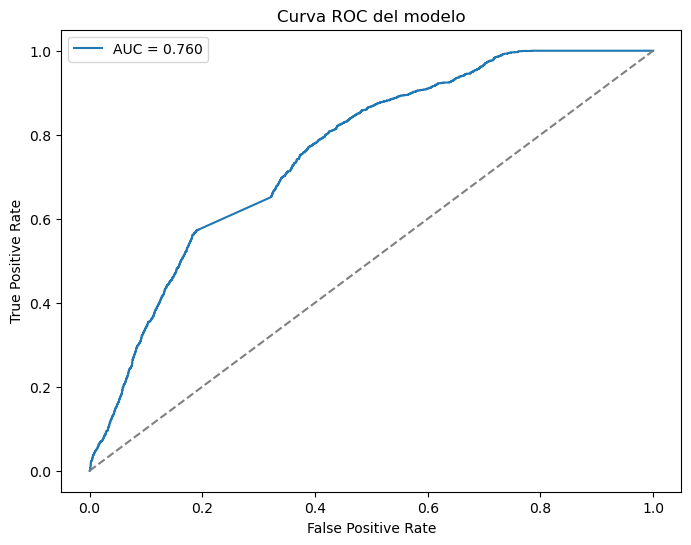

In [24]:
# Gráfico de la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC del modelo')
plt.legend()
plt.show()

In [26]:
# Comparación de modelos
resultados_modelos = pd.DataFrame({
    "Modelo": ["Lasso (L1)", "Modelo Final"],
    "AUC-ROC": [modelo_lasso.scores_[1].mean(), auc(fpr, tpr)],
    "Accuracy": [accuracy_score(y_logistica, modelo_lasso.predict(X_scaled)), accuracy_score(y_logistica, y_pred)],
    "Precision": [precision_score(y_logistica, modelo_lasso.predict(X_scaled)), precision_score(y_logistica, y_pred)],
    "Recall": [recall_score(y_logistica, modelo_lasso.predict(X_scaled)), recall_score(y_logistica, y_pred)],
    "F1-Score": [f1_score(y_logistica, modelo_lasso.predict(X_scaled)), f1_score(y_logistica, y_pred)]
})

print("Comparación entre modelos:")
print(resultados_modelos)

Comparación entre modelos:
         Modelo   AUC-ROC  Accuracy  Precision    Recall  F1-Score
0    Lasso (L1)  0.753369  0.616238   0.353719  0.872858  0.503427
1  Modelo Final  0.759633  0.627202   0.352984  0.807629  0.491258


In [28]:
# Justificación del Modelo Ganador
modelo_winner_summary = modelo_winner_sm.summary()
print(modelo_winner_summary)
print(f"Punto de corte óptimo: {optimal_threshold}")

                           Logit Regression Results                           
Dep. Variable:              Izquierda   No. Observations:                 8117
Model:                          Logit   Df Residuals:                     8113
Method:                           MLE   Df Model:                            3
Date:                Fri, 28 Feb 2025   Pseudo R-squ.:                  0.1328
Time:                        13:36:38   Log-Likelihood:                -3734.3
converged:                       True   LL-Null:                       -4306.2
Covariance Type:            nonrobust   LLR p-value:                1.221e-247
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -1.0015      0.038    -26.183      0.000      -1.076      -0.926
Izda_Pct_x_Otros_Pct                 0.0011   9.15e-05     12.400